<a href="https://colab.research.google.com/github/hafildabelafadhilah/MachineLearning/blob/main/Final_Project_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from pandas._libs.algos import diff_2d

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import r2_score

from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
df=pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
num=[	'Churn',	'Tenure',	'CityTier',	'WarehouseToHome',	'HourSpendOnApp',	'NumberOfDeviceRegistered',	'SatisfactionScore', 'NumberOfAddress'	, 'Complain',	'OrderAmountHikeFromlastYear',	'CouponUsed'	,'OrderCount',	'DaySinceLastOrder',	'CashbackAmount']
cat=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [ ]:
df[num].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df[cat].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
for col in cat:
  print(f'value count untuk kolom {col}:')
  print(df[col].value_counts())
  print()

value count untuk kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

value count untuk kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

value count untuk kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

value count untuk kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

value count untuk kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



# Data Cleansing

In [ ]:
#Cek Missing Value
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

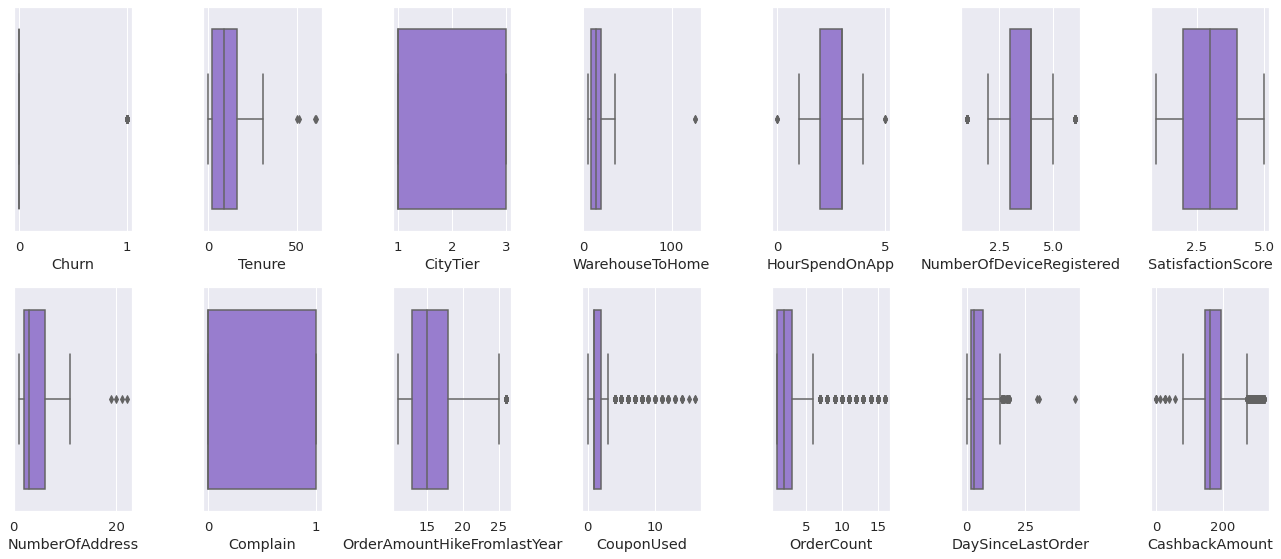

In [ ]:
#Cek sebarang data terlebih dahulu
plt.figure(figsize=(18,8))
for i in range (0, len(num)):
  plt.subplot(2, len(num)/2, i+1)
  sns.boxplot(df[num[i]], color='mediumpurple', orient='v')
  plt.tight_layout()

In [ ]:
#Handling Missing Value
df1=df.fillna(df['Tenure'].median())
df1=df.fillna(df['WarehouseToHome'].median())
df1=df.fillna(df['HourSpendOnApp'].median())
df1=df.fillna(df['OrderAmountHikeFromlastYear'].median())
df1=df.fillna(df['CouponUsed'].median())
df1=df.fillna(df['OrderCount'].median())
df1=df.fillna(df['DaySinceLastOrder'].median())

In [ ]:
df1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
#Cek duplikasi data
df1.duplicated().sum()

0

In [ ]:
#Handling Outlier menggunakan Zscore
print(f'jumlah baris sebelum di filter : {len(df1)}')

filtered_entries=np.array([True]*len(df1)) 
for col in ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']: 
  zscore = abs(stats.zscore(df1[col])) 
  filtered_entries= (zscore < 3) & filtered_entries 
df2=df1[filtered_entries]

print(f'jumlah baris setelah di filter: {len(df2)}')

jumlah baris sebelum di filter : 5630
jumlah baris setelah di filter: 5350


In [ ]:
#Scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df2['CashbackAmount'] = StandardScaler().fit_transform(df2['CashbackAmount'].values.reshape(len(df2), 1))
df2['CouponUsed'] = StandardScaler().fit_transform(df2['CouponUsed'].values.reshape(len(df2), 1))
df2['OrderCount'] = StandardScaler().fit_transform(df2['OrderCount'].values.reshape(len(df2), 1))
df2['Complain'] = StandardScaler().fit_transform(df2['Complain'].values.reshape(len(df2), 1))
df2['OrderAmountHikeFromlastYear'] = StandardScaler().fit_transform(df2['OrderAmountHikeFromlastYear'].values.reshape(len(df2), 1))
df2['DaySinceLastOrder'] = StandardScaler().fit_transform(df2['DaySinceLastOrder'].values.reshape(len(df2), 1))
df2['NumberOfAddress'] = StandardScaler().fit_transform(df2['NumberOfAddress'].values.reshape(len(df2), 1))
df2['SatisfactionScore'] = StandardScaler().fit_transform(df2['SatisfactionScore'].values.reshape(len(df2), 1))
df2['NumberOfDeviceRegistered'] = StandardScaler().fit_transform(df2['NumberOfDeviceRegistered'].values.reshape(len(df2), 1))
df2['HourSpendOnApp'] = StandardScaler().fit_transform(df2['HourSpendOnApp'].values.reshape(len(df2), 1))
df2['WarehouseToHome'] = StandardScaler().fit_transform(df2['WarehouseToHome'].values.reshape(len(df2), 1))
df2['CityTier'] = StandardScaler().fit_transform(df2['CityTier'].values.reshape(len(df2), 1))
df2['Tenure'] = StandardScaler().fit_transform(df2['Tenure'].values.reshape(len(df2), 1))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

# Future Encoding

In [ ]:
#Feature Encoding
onehot=pd.get_dummies(df2[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']])
df2=df2.join(onehot)


# Imbalance

In [ ]:
df2['Churn_class'] = df2['Churn'] > 0.8
df2['Churn_class'].value_counts()

False    4438
True      912
Name: Churn_class, dtype: int64

In [ ]:
x = df2[[col for col in df2.columns if (str(df2[col].dtype) != 'object') and col not in ['Churn', 'Churn_class']]]
y = df2['Churn_class'].values
print(x.shape)
print(y.shape)

(5350, 34)
(5350,)


In [ ]:
x

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.663060,1.474493,-1.063267,0.100132,-0.658056,-0.766279,1.887979,1.578660,-0.970840,-0.418673,...,0,0,0,1,0,0,0,0,0,1
1,-0.783416,-0.714335,-0.827646,0.100132,0.316639,-0.040944,1.101903,1.578660,-0.046189,-1.115160,...,1,0,0,0,1,0,0,0,0,1
2,-0.783416,-0.714335,1.764185,-1.324620,0.316639,-0.040944,0.708865,1.578660,-0.277352,-1.115160,...,1,0,0,0,1,0,0,0,0,1
3,-1.144484,1.474493,-0.002973,-1.324620,0.316639,1.409726,1.494941,-0.633449,1.803112,-1.115160,...,1,0,0,1,0,0,0,0,0,1
4,-1.144484,-0.714335,-0.356404,0.100132,-0.658056,1.409726,-0.470250,-0.633449,-0.970840,-0.418673,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.059076,-0.714335,1.764185,0.100132,-1.632752,-1.491615,0.708865,-0.633449,0.647299,-0.418673,...,1,0,0,1,0,0,0,0,1,0
5626,0.420144,-0.714335,-0.238594,0.100132,1.291335,1.409726,0.708865,-0.633449,0.184973,-0.418673,...,1,1,0,0,0,0,0,0,1,0
5627,-1.024128,-0.714335,-0.474215,0.100132,-1.632752,0.684391,-0.470250,1.578660,1.340787,-0.418673,...,1,0,0,1,0,0,0,0,1,0
5628,1.623704,1.474493,-0.709836,1.524884,1.291335,0.684391,-0.077212,-0.633449,-0.046189,0.277814,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x, y)
pd.Series(y_under).value_counts()

False    912
True     912
dtype: int64

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

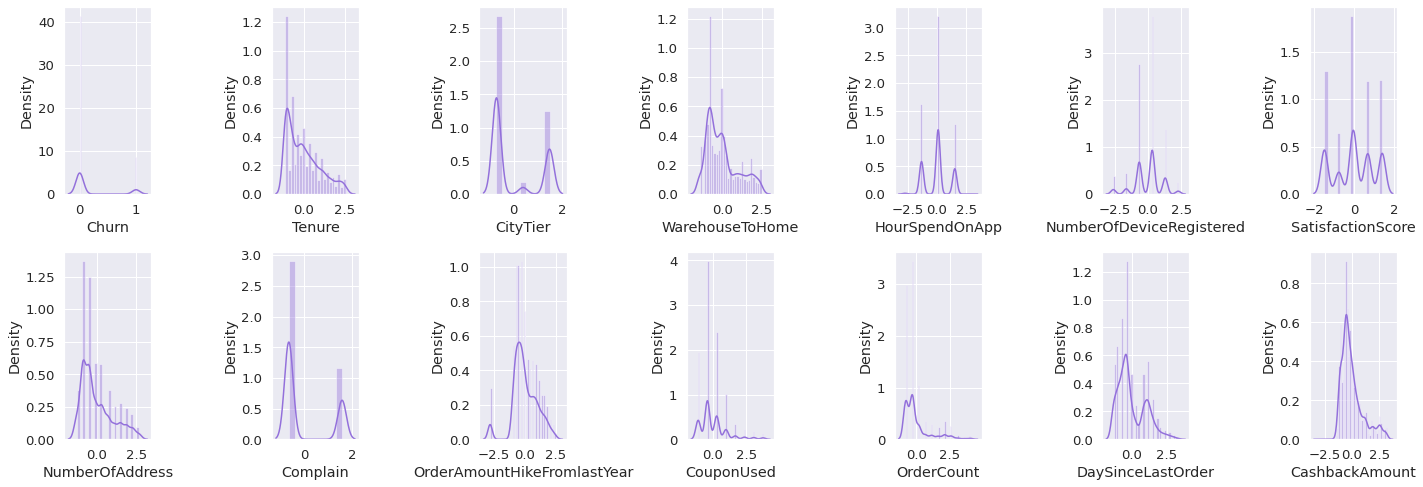

In [ ]:
plt.figure(figsize=(18,7))
for i in range(0, len(num)):
  plt.subplot(2, len(num)/2, i+1)
  sns.distplot( df2[num[i]], color="mediumpurple")
  plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

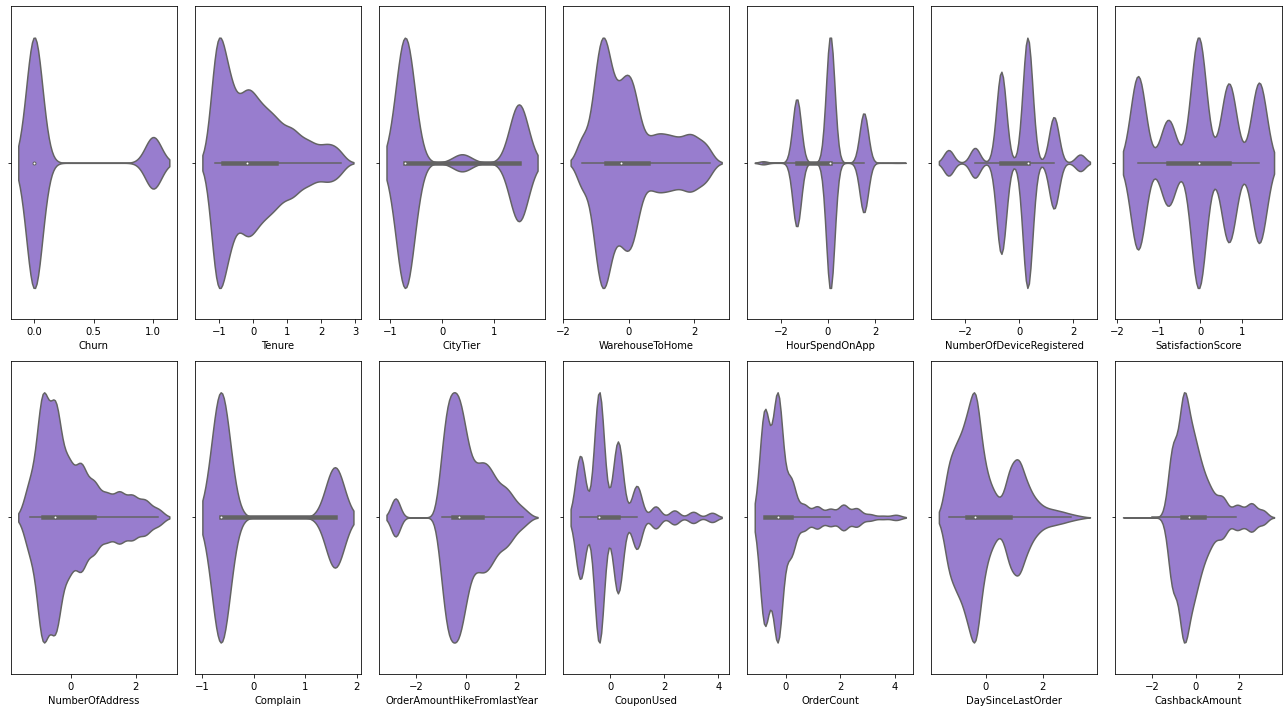

In [ ]:
plt.figure(figsize=(18,10))
for i in range(0, len(num)):
  plt.subplot(2, len(num)/2, i+1)
  sns.violinplot( df2[num[i]], color="mediumpurple", orient='h')
  plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

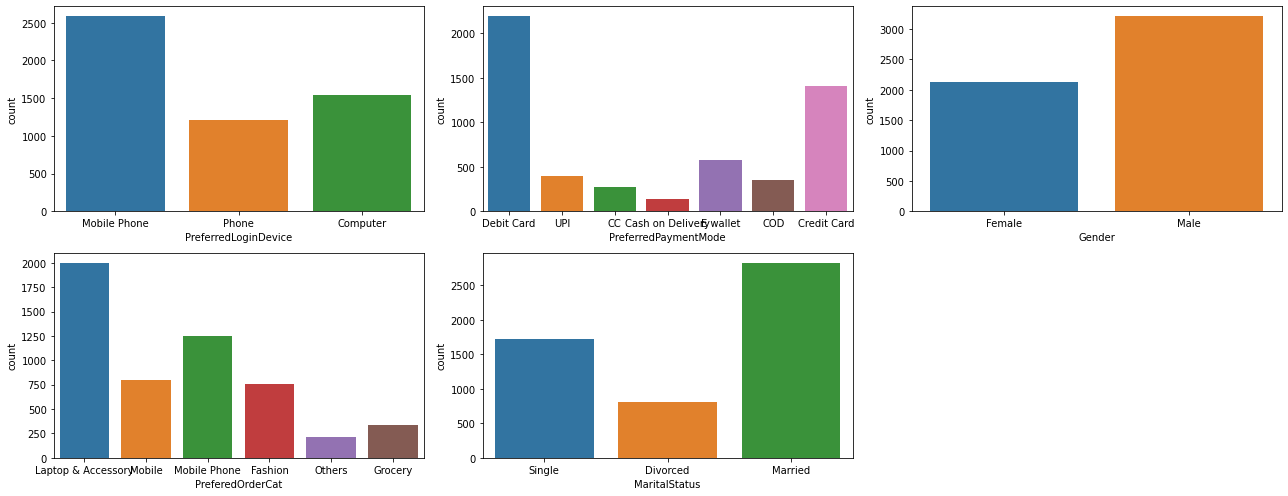

In [ ]:
plt.figure(figsize=(18,7))
for i in range(0, len(cat)):
  plt.subplot(2, 3, i+1)
  sns.countplot( df2[cat[i]])
  plt.tight_layout()

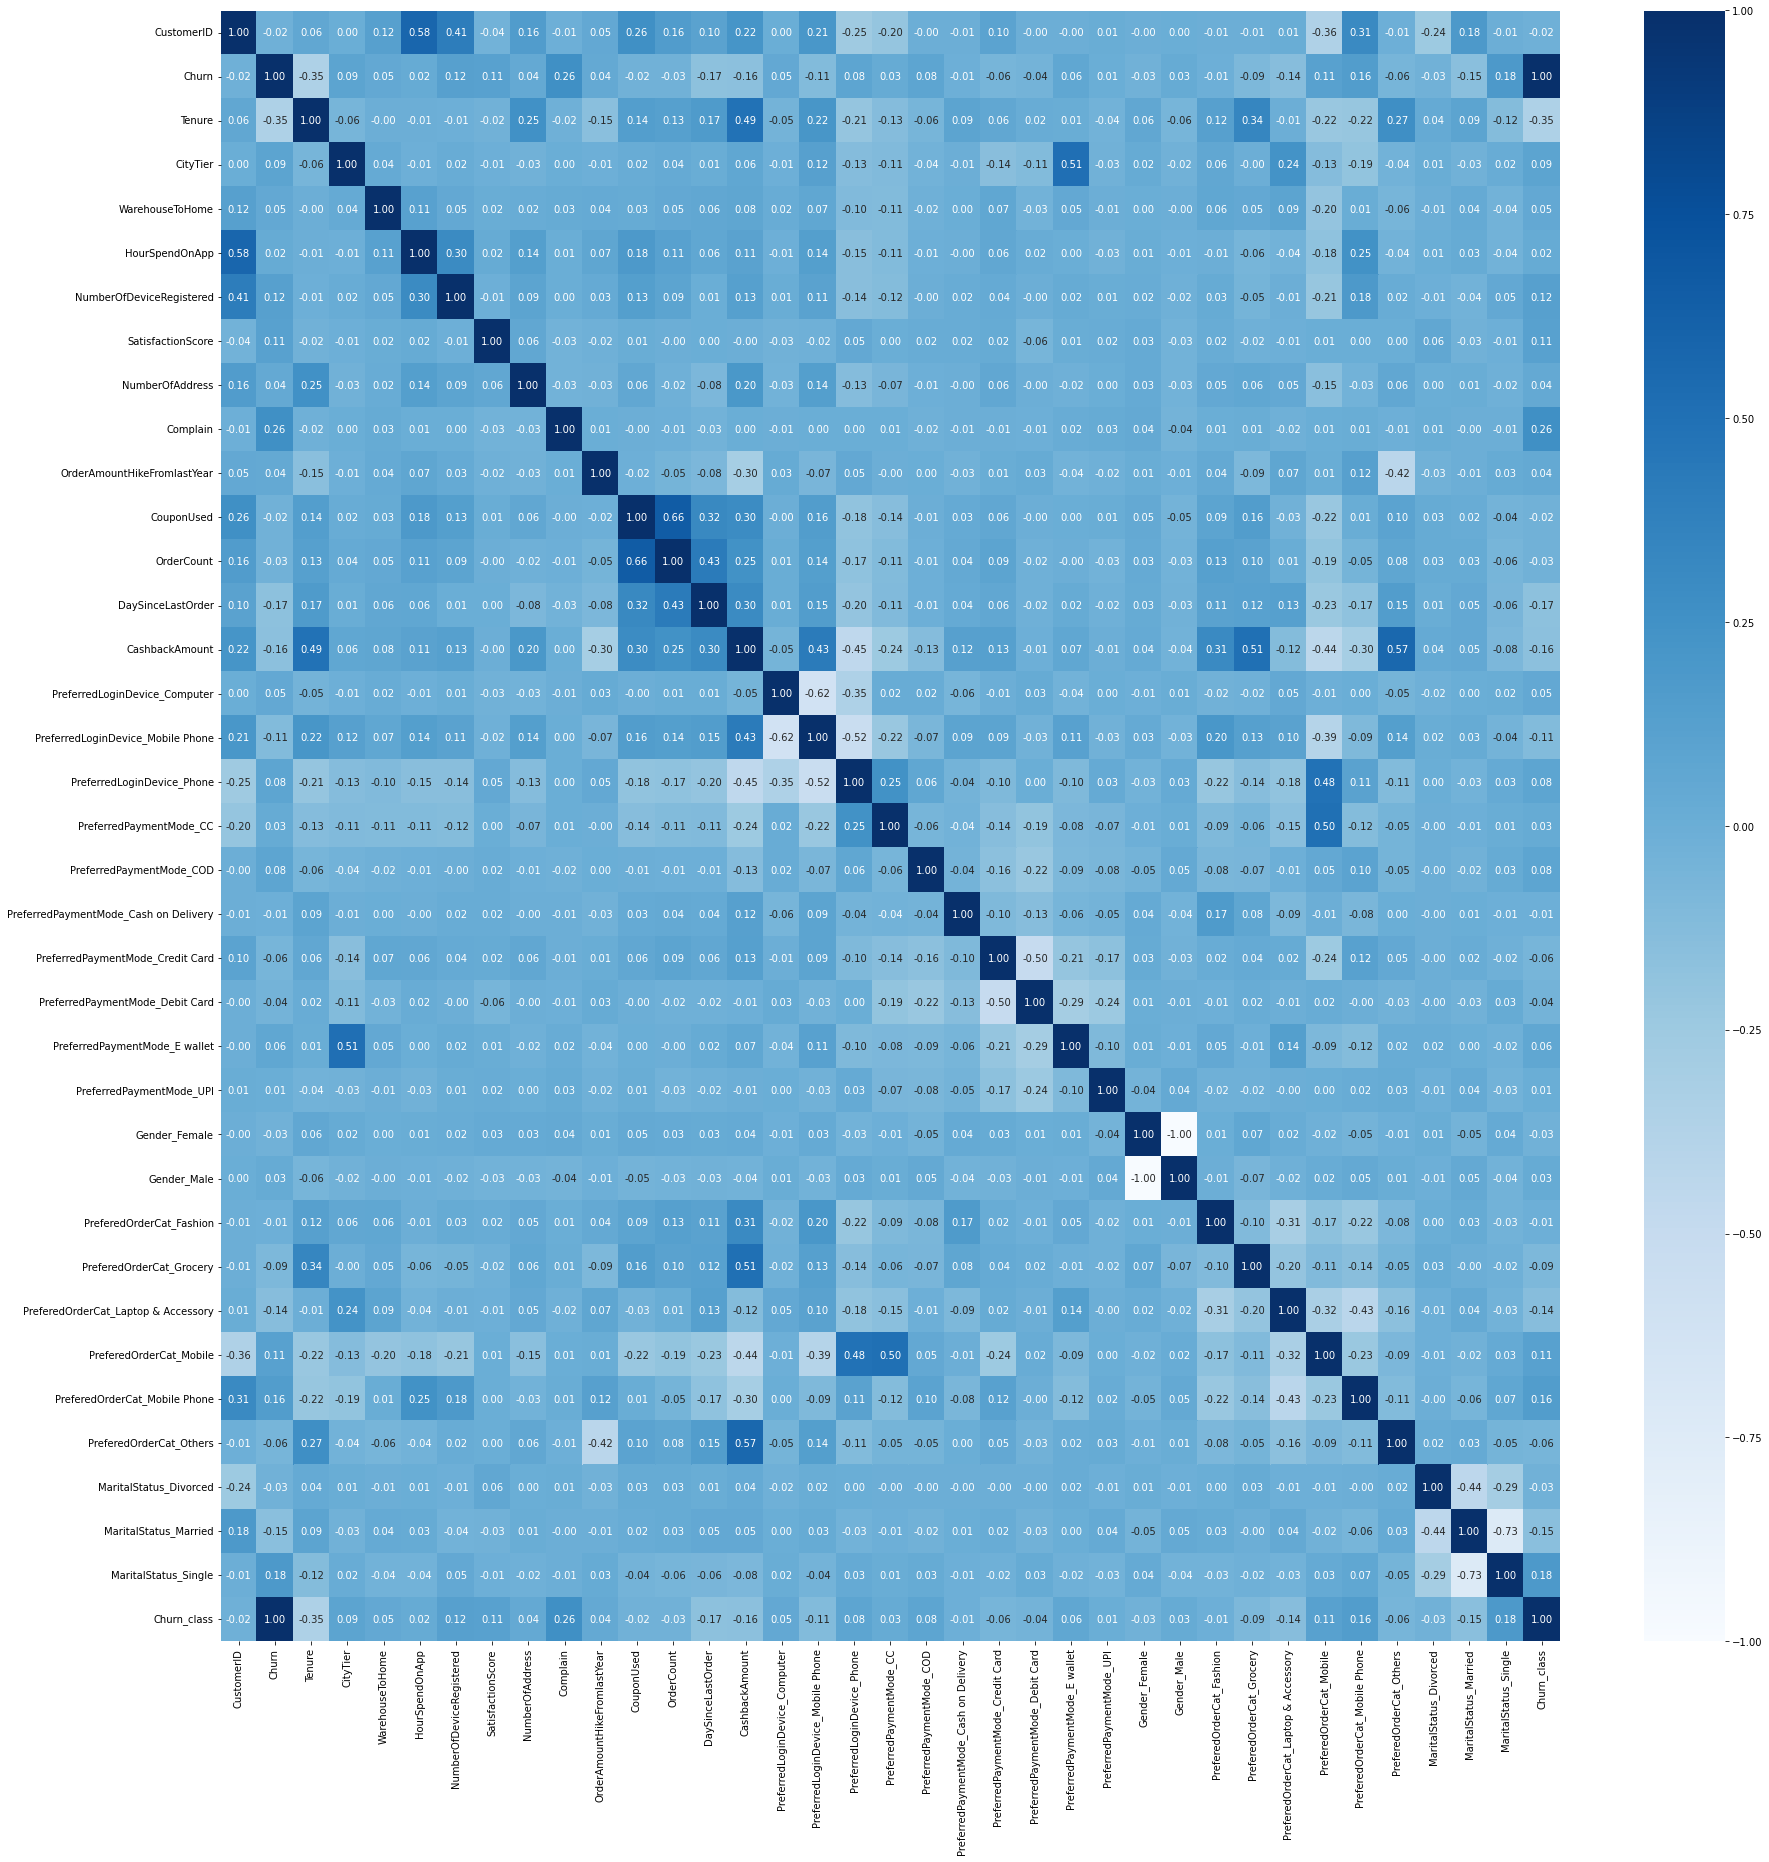

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, fmt=".2f")

In [ ]:
#Drop Data
#Drop Feature
df2.drop(['CustomerID', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'],axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5350 non-null   int64  
 1   Tenure                                 5350 non-null   float64
 2   CityTier                               5350 non-null   float64
 3   WarehouseToHome                        5350 non-null   float64
 4   HourSpendOnApp                         5350 non-null   float64
 5   NumberOfDeviceRegistered               5350 non-null   float64
 6   SatisfactionScore                      5350 non-null   float64
 7   NumberOfAddress                        5350 non-null   float64
 8   Complain                               5350 non-null   float64
 9   OrderAmountHikeFromlastYear            5350 non-null   float64
 10  CouponUsed                             5350 non-null   float64
 11  Orde

# MODELLING

In [ ]:
#Split dataset
x=df2.drop(['Churn', 'Churn_class'], axis=1)
y=df2['Churn']
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
#Model Regresi Logistik
logrek = LogisticRegression().fit(xtrain, ytrain) 
print('Model Logistic Regression yang terbentuk adalah: \n',logrek)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


In [ ]:
# Accuracy - Training Data
logrek.score(xtrain, ytrain)

0.8929238985313752

In [ ]:
#Menampilkan hasil training dengan confusion matrix dari data train

y_train_pred=logrek.predict(xtrain)
print('classification report training model regresi logistik:')
print(classification_report(ytrain, y_train_pred))

classification report training model regresi logistik:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3098
           1       0.77      0.55      0.64       647

    accuracy                           0.89      3745
   macro avg       0.84      0.76      0.79      3745
weighted avg       0.89      0.89      0.89      3745



AUC: 0.898


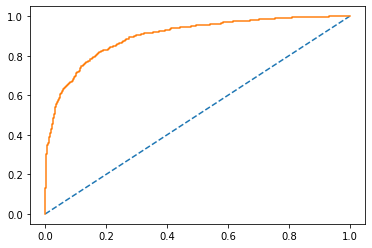

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = logrek.predict_proba(xtrain)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(ytrain, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

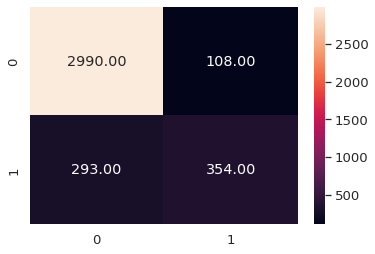

In [ ]:
#confusion matrix training Data
cm_lr = confusion_matrix(ytrain, y_train_pred)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = '.2f')

In [ ]:
# Accuracy - Test Data
logrek.score(xtest, ytest)

0.8959501557632399

In [ ]:
#Menampilkan hasil training dengan confusion matrix dari data test
y_test_pred=logrek.predict(xtest)
print('classification report training model regresi logistik:')
print(classification_report(ytrain, y_train_pred))

classification report training model regresi logistik:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3098
           1       0.77      0.55      0.64       647

    accuracy                           0.89      3745
   macro avg       0.84      0.76      0.79      3745
weighted avg       0.89      0.89      0.89      3745



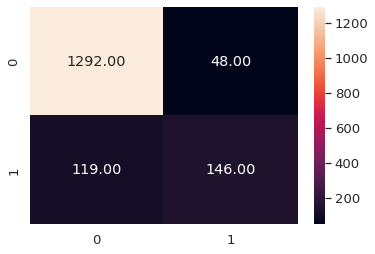

In [ ]:
#confusion matrix test Data
cm_lr = confusion_matrix(ytest, y_test_pred)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = '.2f')

In [ ]:
#KNN MODEL 
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(xtrain,ytrain)

KNeighborsClassifier()

0.9449933244325768
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3098
           1       0.94      0.73      0.82       647

    accuracy                           0.94      3745
   macro avg       0.94      0.86      0.89      3745
weighted avg       0.94      0.94      0.94      3745

Confusion Matrix


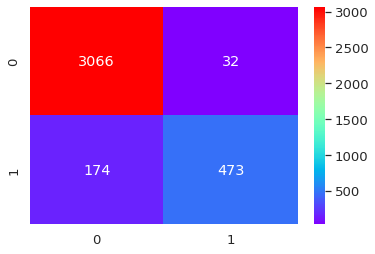

In [ ]:
## Performance Matrix on train data set
y_train_pred = KNN_model.predict(xtrain)
model_score = KNN_model.score(xtrain, ytrain)
print(model_score)
print(classification_report(ytrain, y_train_pred))
#confusion matrix training Data
cm_train_knn = confusion_matrix(ytrain, y_train_pred)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.9146417445482866
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3098
           1       0.94      0.73      0.82       647

    accuracy                           0.94      3745
   macro avg       0.94      0.86      0.89      3745
weighted avg       0.94      0.94      0.94      3745

Confusion Matrix


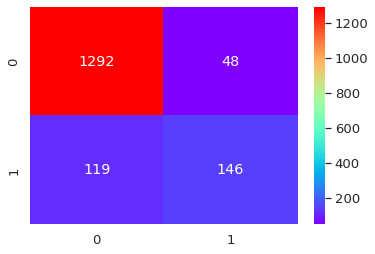

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(xtest)
model_score = KNN_model.score(xtest, ytest)
print(model_score)
print(classification_report(ytrain, y_train_pred))
#confusion matrix test Data
cm_test_knn = confusion_matrix(ytest, y_test_pred)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=1000,random_state=12)
RF_model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=12)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3098
           1       1.00      1.00      1.00       647

    accuracy                           1.00      3745
   macro avg       1.00      1.00      1.00      3745
weighted avg       1.00      1.00      1.00      3745

Confusion Matrix


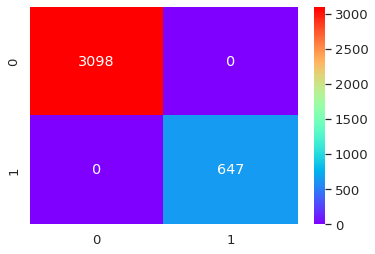

In [ ]:
## Performance Matrix on train data set
y_train_pred = RF_model.predict(xtrain)
model_score =RF_model.score(xtrain, ytrain)
print(model_score)
print(classification_report(ytrain, y_train_pred))
#confusion matrix training Data
cm_train_rf = confusion_matrix(ytrain, y_train_pred)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')


0.9638629283489096
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1340
           1       0.95      0.82      0.88       265

    accuracy                           0.96      1605
   macro avg       0.96      0.91      0.93      1605
weighted avg       0.96      0.96      0.96      1605

Confusion Matrix


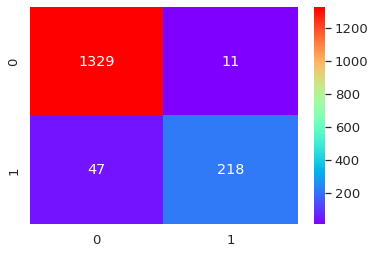

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(xtest)
model_score = RF_model.score(xtest, ytest)
print(model_score)
print(classification_report(ytest, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(ytest, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
#DT
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3098
           1       1.00      1.00      1.00       647

    accuracy                           1.00      3745
   macro avg       1.00      1.00      1.00      3745
weighted avg       1.00      1.00      1.00      3745



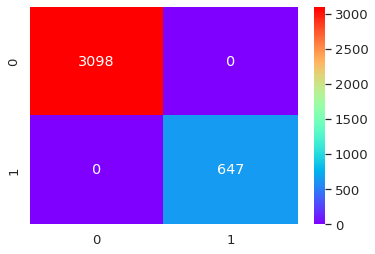

In [ ]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(xtrain)
model_score = DT_model.score(xtrain, ytrain)
print(model_score)
print(classification_report(ytrain, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(ytrain, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9632398753894081
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1340
           1       0.88      0.91      0.89       265

    accuracy                           0.96      1605
   macro avg       0.93      0.94      0.93      1605
weighted avg       0.96      0.96      0.96      1605

Confusion Matrix


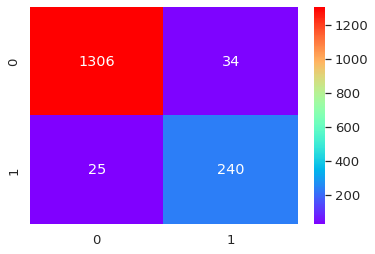

In [ ]:

## Performance Matrix on test data set
y_test_predict = DT_model.predict(xtest)
model_score = DT_model.score(xtest, ytest)
print(model_score)
print(classification_report(ytest, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(ytest, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Latih model dengan GradientBoostingClassifier()
gbt_model = GradientBoostingClassifier().fit(xtrain, ytrain)
print(gbt_model)

GradientBoostingClassifier()


In [ ]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_train_pred = gbt_model.predict(xtrain)
# Print classification report 
print('Classification Report Training Model (Gradien Boosting) :')
print(classification_report(ytrain, y_train_pred))

Classification Report Training Model (Gradien Boosting) :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3098
           1       0.88      0.71      0.79       647

    accuracy                           0.93      3745
   macro avg       0.91      0.84      0.87      3745
weighted avg       0.93      0.93      0.93      3745



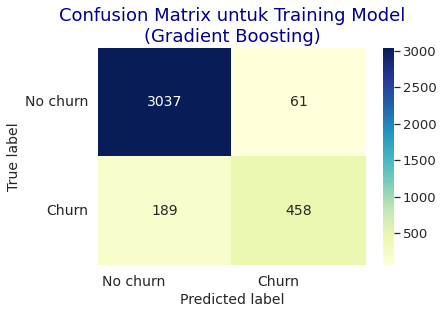

In [ ]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(ytrain, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1340
           1       0.75      0.55      0.64       265

    accuracy                           0.90      1605
   macro avg       0.83      0.76      0.79      1605
weighted avg       0.89      0.90      0.89      1605



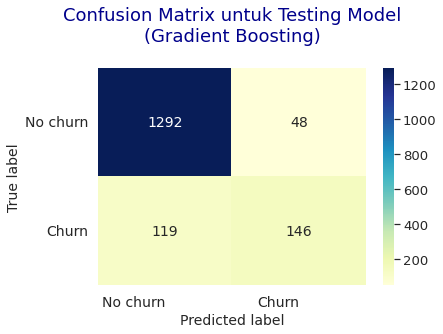

In [ ]:
#Menampilkan hasil testing model dengan confusion matrix # Predict y_test_pred = gbt_model.predict(x_test) 
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):') 
print(classification_report(ytest, y_test_pred))

#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(ytest, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()
